In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import glob
import math

In [2]:
# parameter setting
path1 = "X:/XXXX/XXXX"# path, import
path2 = "X:/XXXX/XXXX"# path, export
roi_size=150 # size of cropped images (pixels)

In [3]:
def Tiff_to_BMP(file,filename,path2):
    # import images
    im=tiff.imread(file) # (z,c,y,x)

    im_b = im[0, :, :] # blue channel
    im_g = im[1, :, :] # green channel
    im_r = im[2, :, :] # red channel

    im_size_y=im.shape[1]
    im_size_x=im.shape[2]

    # standardization
    im_b = (im_b - np.mean(im_b))/np.std(im_b)*16+64
    im_g = (im_g - np.mean(im_g))/np.std(im_g)*16+64
    im_r = (im_r - np.mean(im_r))/np.std(im_r)*16+64
    
    im_merge=np.stack([im_r/255,im_g/255,im_b/255],axis=2) # merge image (r,g,b)
    im_merge.shape
    
    # preprocessing for thresholding
    g_im_b = cv2.GaussianBlur(im_b, (35, 35), 11) # to be adjusted depending on image conditions
    g_im_b=g_im_b.astype("int") # change type to integer
    g_im_b=g_im_b.astype(np.uint8)


    # thresholding (Otsu)
    th, bi_im_b = cv2.threshold(g_im_b,0,255, cv2.THRESH_OTSU) 

    # labeling of objects
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(bi_im_b)
    print('Number of labeled objects:', retval)
    plt.imshow(labels)
    plt.show

    # make square rois around centroids
    centroids=centroids[:,::-1] # switch x and b    
    roi=roi_size
    p1=centroids-math.ceil(roi/2) # top left corner
    p2=np.stack([centroids[:,0]-math.ceil(roi/2), centroids[:,1]+math.floor(roi/2)],axis=1) # top right
    p3=np.stack([centroids[:,0]+math.floor(roi/2), centroids[:,1]-math.ceil(roi/2)],axis=1) # bot left
    p4=centroids+math.ceil(roi/2)# bot right

    if(path2[-1]!="/"):
        path2=path2+"/"
    for i in range(centroids.shape[0]):
        if int(p1[i,0])>0 and int(p1[i,1])>0 and int(p2[i,1])<im_size_x and int(p3[i,0])<im_size_y:
            cell_b=im_b[int(p1[i,0]):int(p3[i,0]),int(p1[i,1]):int(p2[i,1])]
            cell_g=im_g[int(p1[i,0]):int(p3[i,0]),int(p1[i,1]):int(p2[i,1])]
            cell_r=im_r[int(p1[i,0]):int(p3[i,0]),int(p1[i,1]):int(p2[i,1])]
            r=np.zeros((roi,roi), dtype = np.float32)
            merge=np.stack([cell_b,cell_g,r],axis=2)
            cv2.imwrite(path2+filename+"_"+str(i)+".bmp",merge)
            cv2.imwrite(path2+filename+"_"+str(i)+"marker.bmp",cell_r)

------Processing MAX_RPE1_Nuc_GM130_CENPF_001------
Number of labeled objects: 27
------Processing MAX_RPE1_Nuc_GM130_CENPF_002------
Number of labeled objects: 22
------Processing MAX_RPE1_Nuc_GM130_CENPF_003------
Number of labeled objects: 21
------Processing MAX_RPE1_Nuc_GM130_CENPF_004------
Number of labeled objects: 24
------Processing MAX_RPE1_Nuc_GM130_CENPF_005------
Number of labeled objects: 21
------Processing MAX_RPE1_Nuc_GM130_CENPF_006------
Number of labeled objects: 27
------Processing MAX_RPE1_Nuc_GM130_CENPF_007------
Number of labeled objects: 27
------Processing MAX_RPE1_Nuc_GM130_CENPF_008------
Number of labeled objects: 27
------Processing MAX_RPE1_Nuc_GM130_CENPF_009------
Number of labeled objects: 22
------Processing MAX_RPE1_Nuc_GM130_CENPF_010------
Number of labeled objects: 15
------Processing MAX_RPE1_Nuc_GM130_CENPF_011------
Number of labeled objects: 30
------Processing MAX_RPE1_Nuc_GM130_CENPF_012------
Number of labeled objects: 19
------Processing

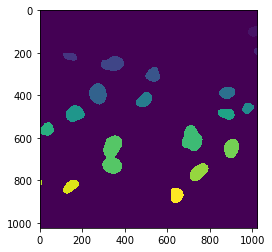

In [4]:
if(path1[-1]=="/"):
    path1=path1[:-1]
for file in glob.glob(path1+"/*.tif"):
    idx = file.rfind("\\") # use "\\" for windows or "/" for mac
    filename = file[idx+1:-4]
    print("------Processing {}------".format(filename))
    Tiff_to_BMP(file,filename,path2)
print("------All done------")